In [123]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [124]:
data = pd.read_csv(r"C:\Users\lenovo\Documents\assignments\Modified_Student_Depression_Dataset.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28396,96000,Male,19.0,Bhopal,Student,3.0,0.0,9.93,5.0,0.0,7-8 hours,Unhealthy,Class 12,Yes,2.0,5.0,Yes,0
28397,94929,Male,30.0,Surat,Student,3.0,0.0,9.50,1.0,0.0,Less than 5 hours,Moderate,MA,Yes,10.0,5.0,No,1
28398,110488,Male,23.0,Varanasi,Student,3.0,0.0,5.74,3.0,0.0,Less than 5 hours,Unhealthy,MBA,Yes,12.0,5.0,No,1
28399,37577,Female,25.0,Surat,Student,1.0,0.0,5.97,1.0,0.0,5-6 hours,Moderate,B.Ed,Yes,3.0,5.0,No,1


In [125]:
###############      Data Exploration
print(data.shape)
data.info()

(28401, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28401 entries, 0 to 28400
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     28401 non-null  int64  
 1   Gender                                 28401 non-null  object 
 2   Age                                    26887 non-null  float64
 3   City                                   26887 non-null  object 
 4   Profession                             28401 non-null  object 
 5   Academic Pressure                      28401 non-null  float64
 6   Work Pressure                          28401 non-null  float64
 7   CGPA                                   28401 non-null  float64
 8   Study Satisfaction                     28401 non-null  float64
 9   Job Satisfaction                       28401 non-null  float64
 10  Sleep Duration                         28401 non-null  obj

<Axes: >

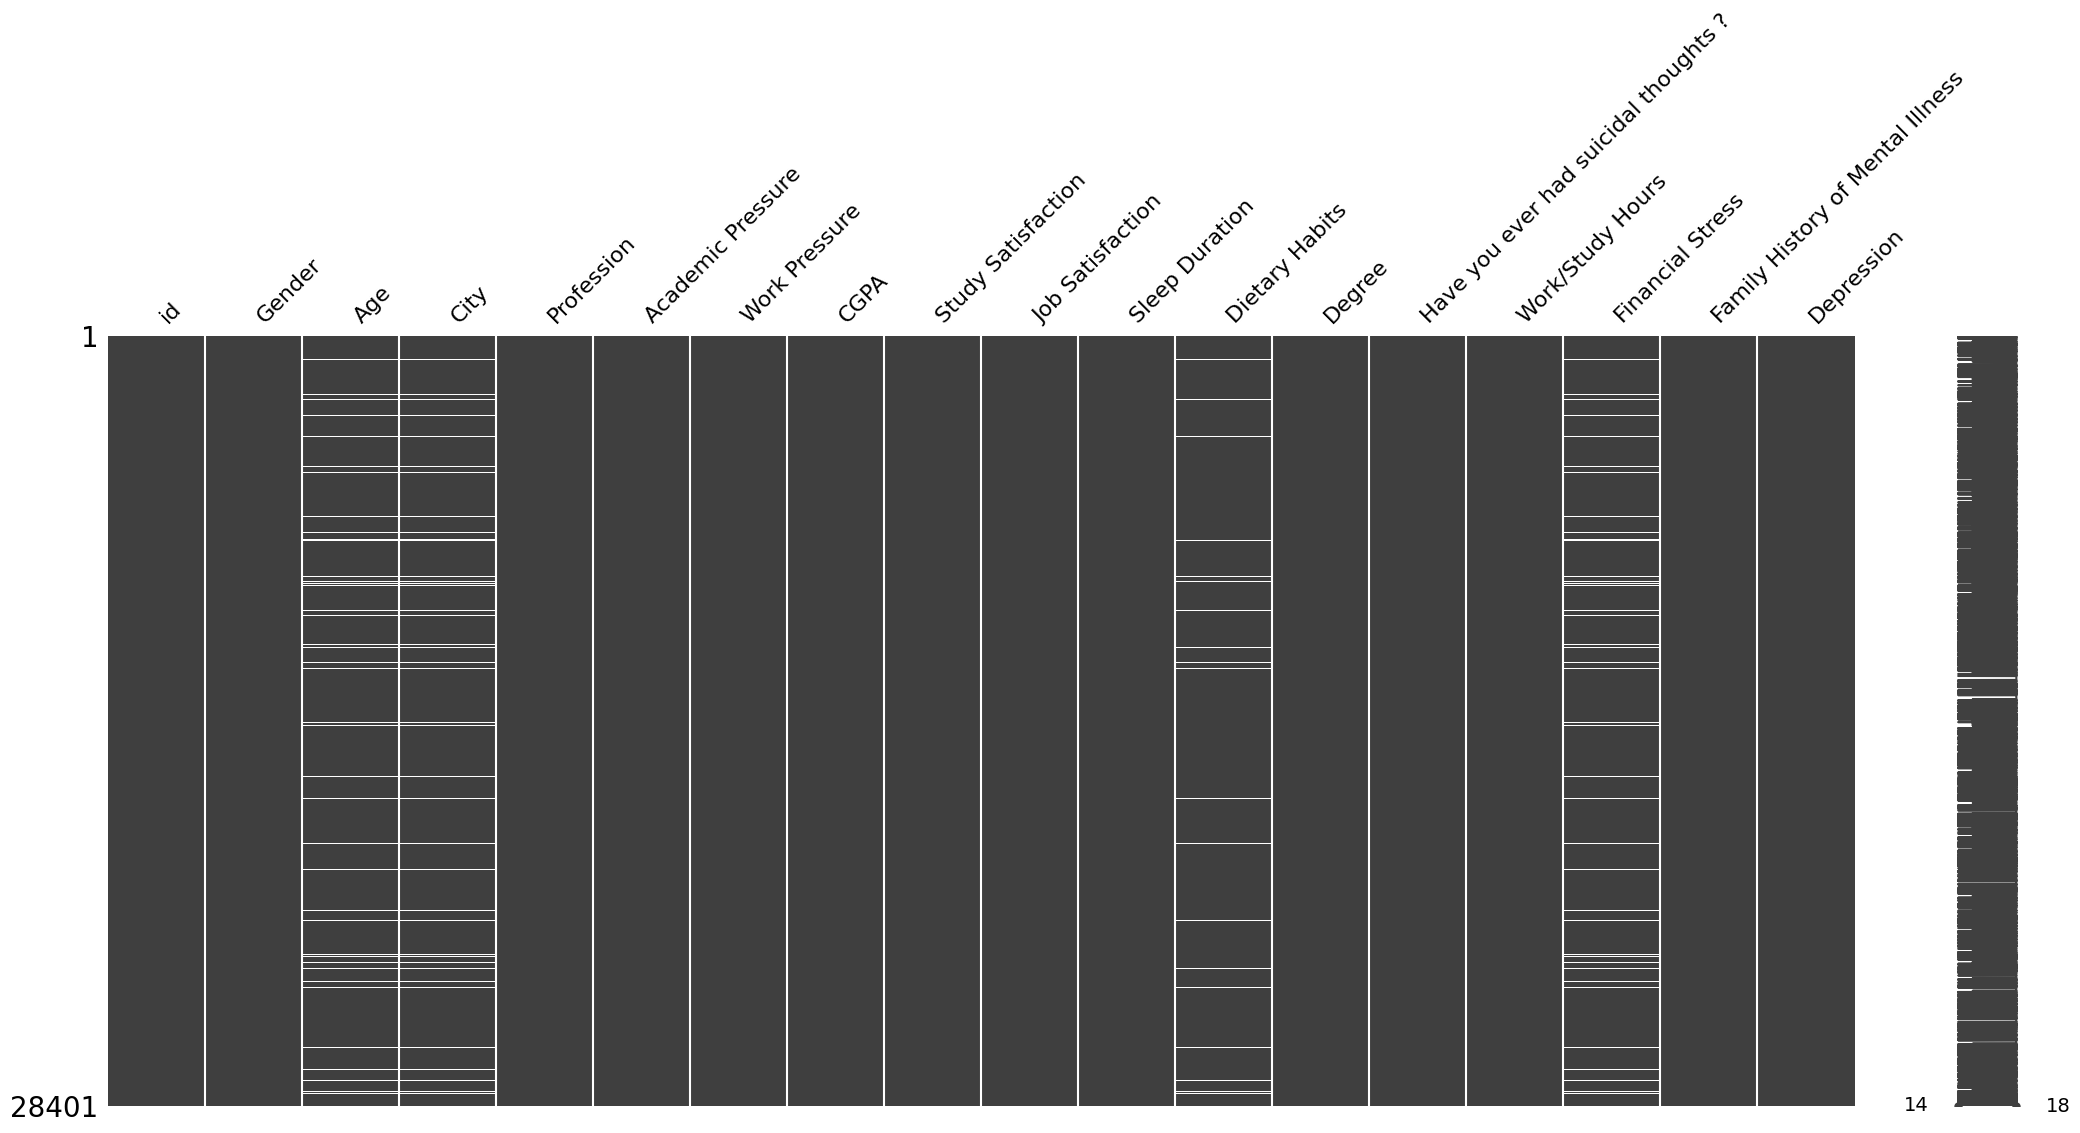

In [126]:
msn.matrix(data)

In [127]:
###############      Data Cleaning
print("Before dropping duplicates: ",sum(data.duplicated()))
data = data.drop_duplicates()
print("After dropping duplicates: ",sum(data.duplicated()))
print()

print("Before handling nulls: ")
print(data.isnull().sum())
data = data.dropna()  
print()
print("After handling nulls: ")
print(data.isnull().sum())


Before dropping duplicates:  500
After dropping duplicates:  0

Before handling nulls: 
id                                          0
Gender                                      0
Age                                      1417
City                                     1417
Profession                                  0
Academic Pressure                           0
Work Pressure                               0
CGPA                                        0
Study Satisfaction                          0
Job Satisfaction                            0
Sleep Duration                              0
Dietary Habits                            851
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                         1420
Family History of Mental Illness            0
Depression                                  0
dtype: int64

After handling nulls: 
id                                       0
Gend

In [128]:
def drop_outliers(thedata , thecolumn):
    Q1 = thedata[thecolumn].quantile(0.25)
    Q3 = thedata[thecolumn].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    thedata = thedata[(thedata[thecolumn] >= lower_bound) & (thedata[thecolumn] <= upper_bound)]

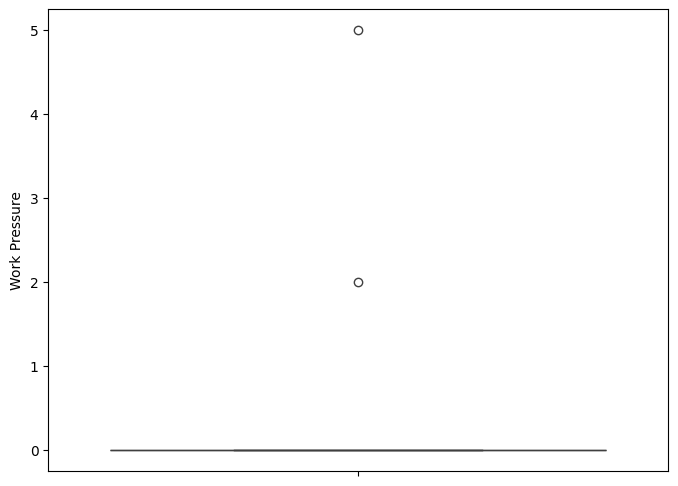

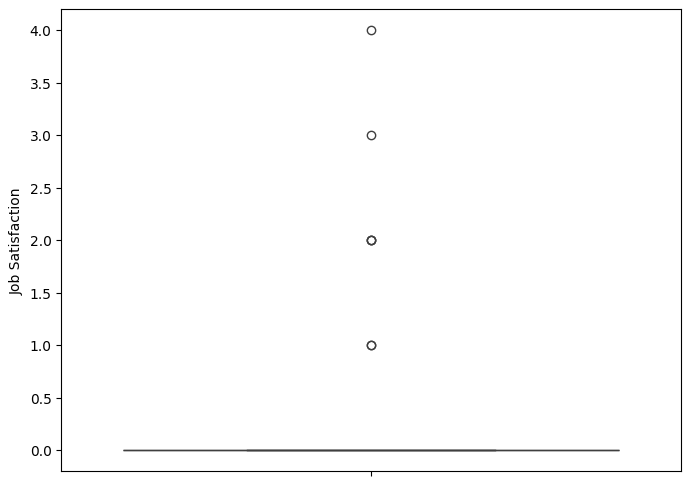

In [129]:
plt.figure(figsize=(8,6))
sns.boxplot(data['Work Pressure'])
plt.show()
plt.figure(figsize=(8,6))
sns.boxplot(data['Job Satisfaction'])
plt.show()
data.drop('Work Pressure', inplace=True, axis=1)
data.drop('Job Satisfaction', inplace=True, axis=1)
drop_outliers(data, 'CGPA')

In [130]:
data

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
